kmeans实验

In [1]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import numpy as np  


def evaluate_classifier_multiple_times(classifier, X, y, n_iterations=10, k=None):  
    all_accuracies = []  
    all_f1_scores = []  
  
    for iteration in range(n_iterations):  
        # 设置十折交叉验证，每次使用不同的random_state  
        kf = KFold(n_splits=10, shuffle=True, random_state=42 + iteration * 10)  # 使用迭代次数作为随机种子  
        scores = []  
        f1_scores_iter = []  
  
        # 遍历交叉验证的每一折  
        for fold, (train_index, test_index) in enumerate(kf.split(X)):  
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
  
            # 将pandas读取的数据转化为list形式
            X_train = X_train.values.tolist()  
            y_train = y_train.values.tolist()  
            # X_test = X_test.values.tolist()  
            y_test = y_test.values.tolist()  
           
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            km = classifier.KMeans(X_train, k=k, y=y_train)
            W1, b1, W2, b2 = km.fit()
            # print('训练后参数',lr.theta)
            y_pred=km.predict(X_test)
            
        
            # print('y_pred',y_pred,len(y_pred))
            # print('y_test',y_test,len(y_test))
            accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)  
            f1 = f1_score(y_test, y_pred, average='macro')  
            scores.append(accuracy)  
            f1_scores_iter.append(f1)  
  
        mean_accuracy = np.mean(scores)  
        std_accuracy = np.std(scores)  
        mean_f1 = np.mean(f1_scores_iter)  
        print(f'第{iteration}次',mean_accuracy)  
        all_accuracies.append(mean_accuracy)  
        all_f1_scores.append(mean_f1)  
  
        # print(f"Iteration {iteration + 1}: Mean Accuracy = {mean_accuracy:.4f}, Std Accuracy = {std_accuracy:.4f}, Mean F1 Score = {mean_f1:.4f}")  

    overall_mean_accuracy = np.mean(all_accuracies)  
    overall_std_accuracy = np.std(all_accuracies)  
    overall_mean_f1 = np.mean(all_f1_scores)  
  
    return overall_mean_accuracy, overall_std_accuracy, overall_mean_f1  
  
# # 示例调用  
# # classifier_instance = YourClassifier()  # 替换为你的分类器实例  
# # X = your_X_data  # 替换为你的特征数据  
# # y = your_y_data  # 替换为你的标签数据  
# # k = your_k_value  # 替换为你的k值  
# # evaluate_classifier_multiple_times(classifier_instance, X, y, k)


当前数据集名字 data\bal.xls
[[3.65625    3.65625    4.40625    4.53125   ]
 [3.8        3.8        4.6        2.        ]
 [4.14285714 4.14285714 2.05714286 4.        ]
 [2.17910448 2.17910448 3.89552239 4.52238806]
 [4.125      4.125      2.08333333 1.45833333]
 [2.02380952 2.02380952 4.69047619 2.26190476]
 [2.89230769 2.89230769 1.35384615 4.10769231]
 [2.90909091 2.90909091 1.40909091 1.5       ]
 [2.89655172 2.89655172 3.39655172 2.        ]
 [1.69565217 1.69565217 1.86956522 3.7173913 ]
 [1.66666667 1.66666667 1.5        1.5       ]
 [1.59090909 1.59090909 3.5        1.40909091]]
[[3.65625    3.65625    4.40625    4.53125   ]
 [3.8        3.8        4.6        2.        ]
 [4.14285714 4.14285714 2.05714286 4.        ]
 [2.17910448 2.17910448 3.89552239 4.52238806]
 [4.125      4.125      2.08333333 1.45833333]
 [2.02380952 2.02380952 4.69047619 2.26190476]
 [2.89230769 2.89230769 1.35384615 4.10769231]
 [2.90909091 2.90909091 1.40909091 1.5       ]
 [2.89655172 2.89655172 3.39655172 2. 

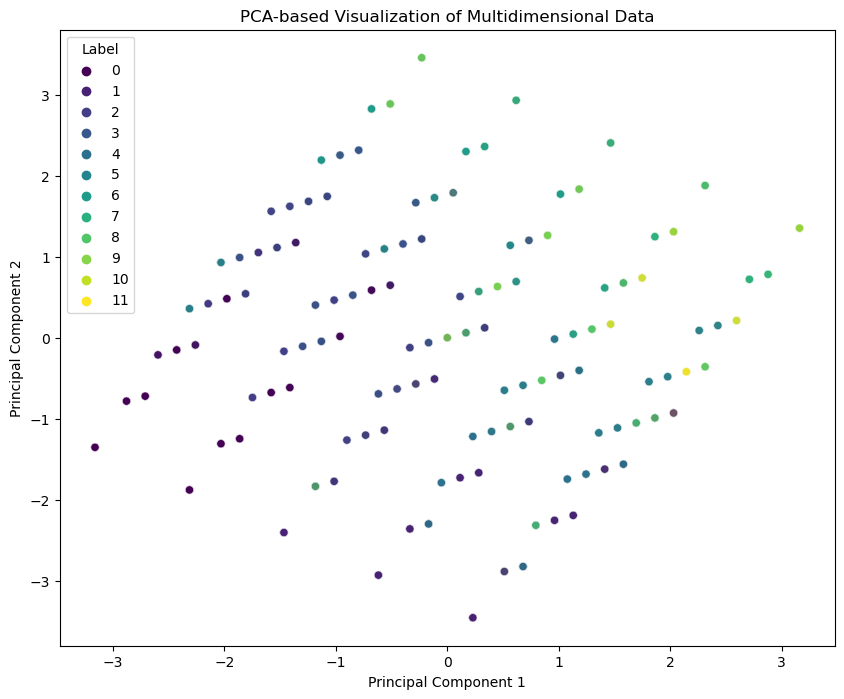

1
当前数据集名字 data\gla.xls
[[1.51491833e+00 1.37383333e+01 1.52333333e+00 2.56833333e+00
  7.13316667e+01 3.12166667e+00 6.24166667e+00 1.31666667e+00
  0.00000000e+00]
 [1.51947068e+00 1.37647727e+01 1.29772727e-01 1.78068182e+00
  7.30202273e+01 2.03863636e-01 1.03934091e+01 5.72045455e-01
  3.88636364e-02]
 [1.51705120e+00 1.29077333e+01 3.42106667e+00 1.38253333e+00
  7.30481333e+01 5.80933333e-01 8.42946667e+00 6.53333333e-03
  7.05333333e-02]
 [1.51990833e+00 1.39800000e+01 2.01833333e+00 1.66250000e+00
  7.20641667e+01 3.20000000e-01 9.56083333e+00 2.45833333e-01
  8.58333333e-02]
 [1.51721718e+00 1.34882051e+01 3.63179487e+00 1.41282051e+00
  7.25325641e+01 5.57179487e-01 8.16051282e+00 0.00000000e+00
  5.17948718e-02]
 [1.51955952e+00 1.34438095e+01 3.50952381e+00 1.14904762e+00
  7.22380952e+01 3.71904762e-01 9.09714286e+00 4.52380952e-02
  6.57142857e-02]
 [1.52268813e+00 1.39600000e+01 3.68812500e+00 7.17500000e-01
  7.15931250e+01 1.03750000e-01 9.81500000e+00 0.00000000e+00
 

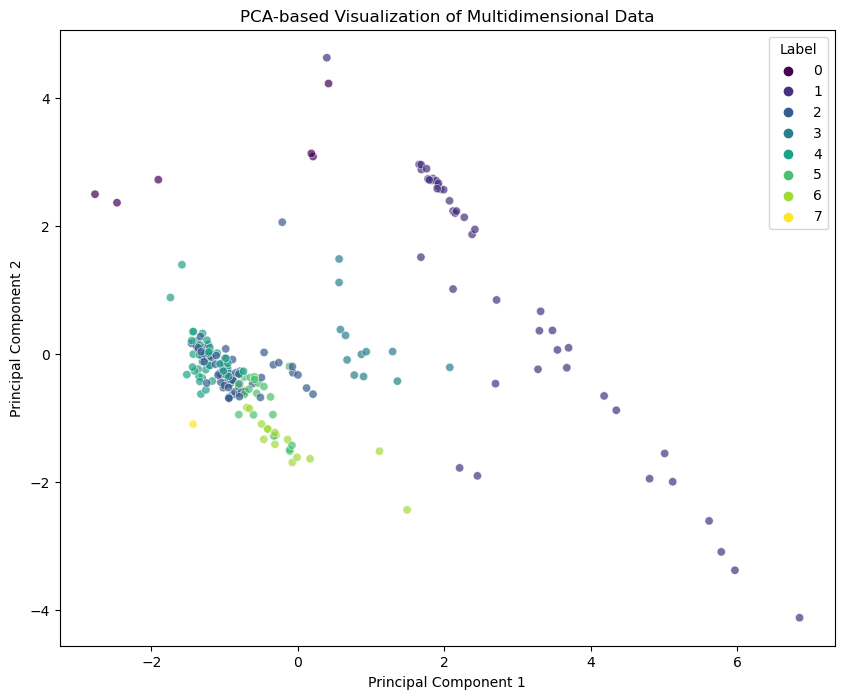

1
当前数据集名字 data\hay.xls
[[1.64       3.36       2.64       1.56      ]
 [1.40909091 1.40909091 3.27272727 2.59090909]
 [2.27777778 2.66666667 1.27777778 3.33333333]
 [1.         1.41176471 2.05882353 1.29411765]
 [2.72727273 2.31818182 1.45454545 1.22727273]
 [1.0625     1.375      1.25       2.8125    ]
 [3.         1.         2.58333333 1.66666667]
 [2.         1.         2.125      1.375     ]
 [1.28571429 2.14285714 1.         1.64285714]
 [3.         1.         1.         2.        ]
 [2.         1.         1.         2.        ]
 [2.         1.         1.         2.        ]]
[[1.64       3.36       2.64       1.56      ]
 [1.40909091 1.40909091 3.27272727 2.59090909]
 [2.27777778 2.66666667 1.27777778 3.33333333]
 [1.         1.41176471 2.05882353 1.29411765]
 [2.72727273 2.31818182 1.45454545 1.22727273]
 [1.0625     1.375      1.25       2.8125    ]
 [3.         1.         2.58333333 1.66666667]
 [2.         1.         2.125      1.375     ]
 [1.28571429 2.14285714 1.         1

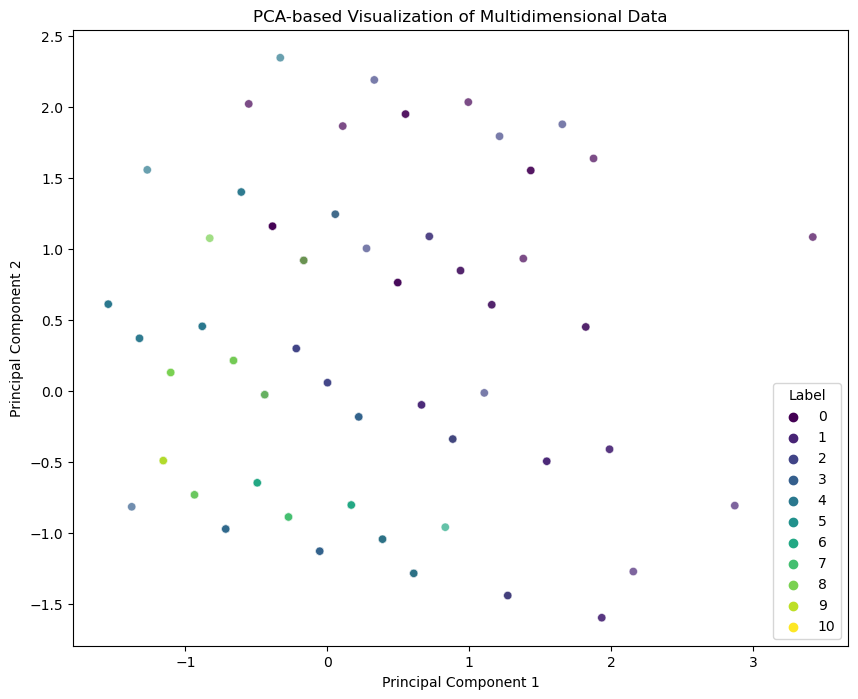

1
当前数据集名字 data\iri.xls
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.52857143 4.04285714 1.47142857 0.28571429]
 [4.94       3.4        1.68       0.38      ]
 [4.68235294 3.02941176 1.41764706 0.18235294]
 [5.425      3.5        1.5        0.25      ]
 [4.6        3.5        1.2        0.25      ]
 [5.14       3.76       1.6        0.3       ]
 [5.         3.3        1.36666667 0.2       ]
 [5.16666667 3.43333333 1.46666667 0.2       ]
 [5.         3.55       1.35       0.25      ]
 [5.1        3.5        1.4        0.25      ]]
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.52857143 4.04285714 1.47142857 0.28571429]
 [4.94       3.4        1.68       0.38      ]
 [4.68235294 3.02941176 1.41764706 0.18235294]
 [5.425      3.5        1.5        0.25      ]
 [4.6        3.5        1.2        0.25      ]
 [5.14       3.76       1.6        0.3       ]
 [5.         3.3        1.36666667 0

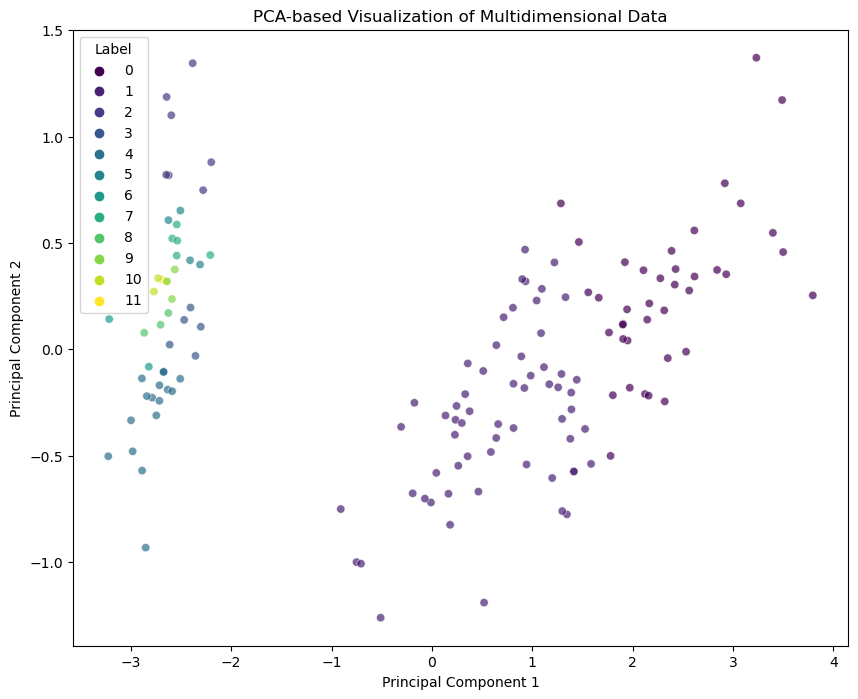

1
当前数据集名字 data\new.xls
[[ 7.14285714e+01  2.12571429e+01  7.28571429e+00  1.14285714e+00
  -5.71428571e-02]
 [ 1.20000000e+02  3.64545455e+00  1.17272727e+00  1.89636364e+01
   3.37909091e+01]
 [ 8.82000000e+01  1.94000000e+01  4.59000000e+00  8.10000000e-01
  -1.00000000e-01]
 [ 1.32272727e+02  2.58181818e+00  8.00000000e-01  1.44818182e+01
   7.14545455e+00]
 [ 1.01400000e+02  6.94500000e+00  1.48500000e+00  1.24500000e+00
   3.77500000e+00]
 [ 1.31363636e+02  1.24181818e+01  2.63636364e+00  1.07272727e+00
   2.56363636e+00]
 [ 1.11428571e+02  1.67857143e+01  2.04285714e+00  9.71428571e-01
   5.42857143e-01]
 [ 1.07133333e+02  6.62000000e+00  1.33333333e+00  1.44666667e+00
   1.66000000e+00]
 [ 1.18216216e+02  9.43783784e+00  1.80540541e+00  1.53513514e+00
   4.28108108e+00]
 [ 9.64736842e+01  1.11684211e+01  2.22105263e+00  1.27368421e+00
   9.00000000e-01]
 [ 1.05769231e+02  1.06076923e+01  1.81153846e+00  1.23846154e+00
   1.27307692e+00]
 [ 1.11926829e+02  8.95609756e+00  1.78292

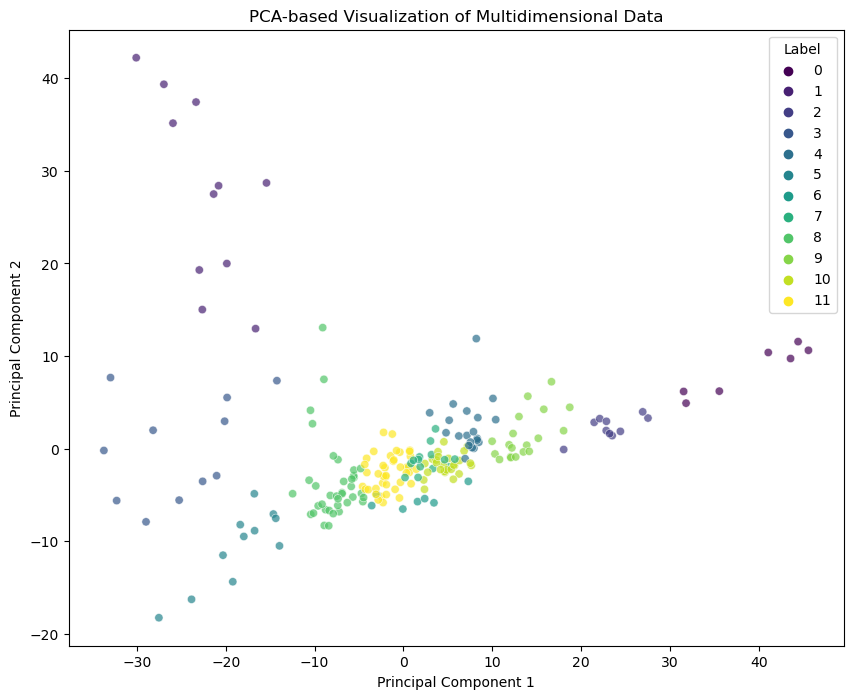

1
当前数据集名字 data\win.xls
[[1.23587097e+01 2.16000000e+00 2.24000000e+00 2.02677419e+01
  9.07741935e+01 2.32451613e+00 2.11483871e+00 3.59354839e-01
  1.57129032e+00 3.16612903e+00 1.03032258e+00 2.74258065e+00
  3.83451613e+02]
 [1.41366667e+01 1.83166667e+00 2.41166667e+00 1.62666667e+01
  1.07666667e+02 3.25500000e+00 3.49333333e+00 2.71666667e-01
  2.21666667e+00 7.23333333e+00 1.11333333e+00 3.02833333e+00
  1.53033333e+03]
 [1.26455263e+01 2.76684211e+00 2.32815789e+00 2.12763158e+01
  9.36315789e+01 1.86368421e+00 1.46763158e+00 4.15263158e-01
  1.35447368e+00 4.83815787e+00 8.68421053e-01 2.28526316e+00
  5.19236842e+02]
 [1.38278571e+01 1.74214286e+00 2.53428571e+00 1.76000000e+01
  1.06214286e+02 2.75928571e+00 2.90500000e+00 3.05714286e-01
  1.77642857e+00 5.93214286e+00 1.11857143e+00 3.00000000e+00
  1.28821429e+03]
 [1.28245238e+01 2.52166667e+00 2.38880952e+00 2.02309524e+01
  9.96190476e+01 1.99571429e+00 1.36047619e+00 4.13809524e-01
  1.40571429e+00 5.80547619e+00 8.692

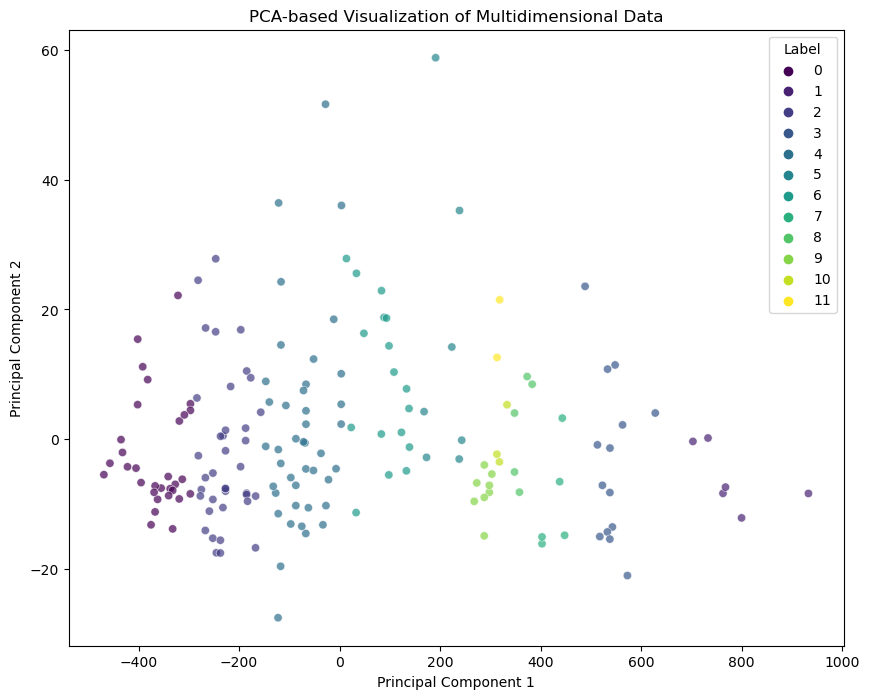

1
当前数据集名字 data\zoo.xls
[[0.02325581 0.46511628 0.90697674 0.06976744 0.37209302 0.55813953
  0.60465116 0.44186047 0.90697674 0.62790698 0.09302326 0.37209302
  0.93023256 0.88372093 0.09302326 0.30232558]
 [0.30769231 0.         0.92307692 0.         0.46153846 0.30769231
  0.46153846 0.         0.         0.69230769 0.23076923 0.
  6.23076923 0.07692308 0.07692308 0.07692308]
 [1.         0.         0.02777778 1.         0.05555556 0.08333333
  0.47222222 0.97222222 1.         1.         0.         0.02777778
  3.61111111 0.91666667 0.22222222 0.75      ]
 [0.         0.         1.         0.         0.         0.71428571
  0.71428571 0.71428571 0.85714286 0.85714286 0.14285714 0.
  4.         0.42857143 0.         0.14285714]
 [1.         0.         0.         1.         0.         0.
  1.         1.         1.         1.         0.         0.
  4.         0.         0.         1.        ]
 [1.         0.         0.         1.         0.         0.
  1.         1.         1.        

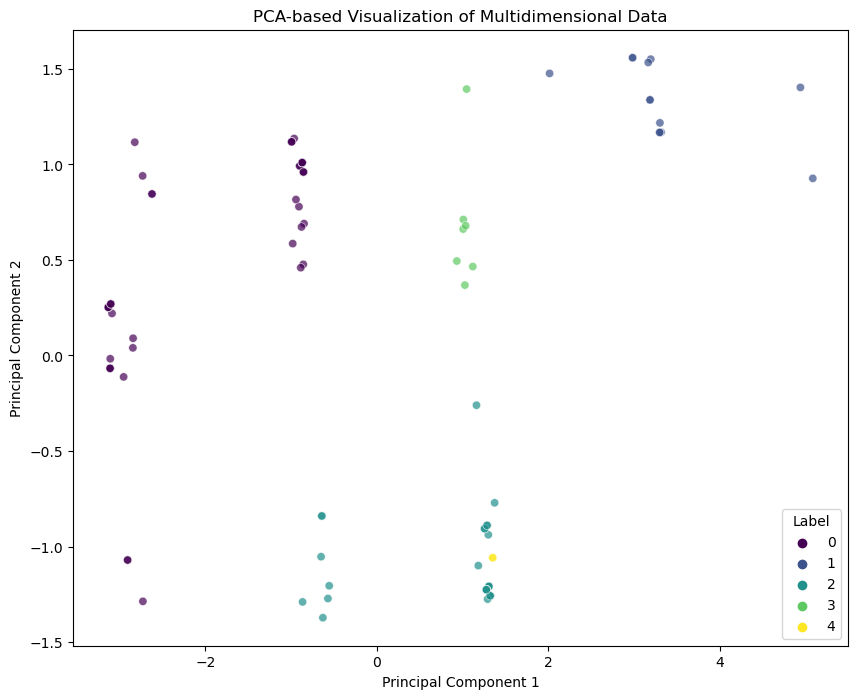

1


In [1]:
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler
from package_py import KMeans10

    
# file_paths =[ "data\\iri.xls"]  # 实际文件路径
file_paths =[ "data\\bal.xls", "data\\gla.xls", "data\\hay.xls", "data\\iri.xls", "data\\new.xls", "data\\win.xls", "data\\zoo.xls"]  # 实际文件路径
mean_accuracys=[]
for i in range(len(file_paths)):
    file_path=file_paths[i]
    print('当前数据集名字',file_path)

    data = pd.read_excel(file_path, header=None)  
    # 将数据分为特征和标签  
    X = data.iloc[:, :-1]  # 前n列是特征  
    y = data.iloc[:, -1]   # 最后一列是分类标签  
    
    # 数据标准hua
    scaler = StandardScaler()  
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    km = KMeans10.KMeans(X, k=12, y=y)
    W1, b1, W2, b2 = km.fit()
    print(1)
    
    # mean_accuracy,std_accuracy,f1=evaluate_classifier_multiple_times(KMeans10,X,y,10,8)
    # # mean_accuracys.append(mean_accuracy)

    # # 使用 f-string 格式化输出  
    # print(f'{file_path} \n  mean_accuracy: {mean_accuracy:.3f} std_accuracy: {std_accuracy:.3f} f1: {f1:.3f}')



调库

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.model_selection import KFold
import numpy as np

# 文件路径列表
file_paths = [r"data\iri.xls"]  # 你可以根据需要添加更多文件路径

# 初始化结果字典（这里我们其实没有使用到results字典，但保留它以备后续扩展）
results = {}

# 对每个数据集进行十次十折交叉验证（注意：这仍然不是K-means的标准交叉验证方法）
for file_path in file_paths:
    # 读取Excel文件
    df = pd.read_excel(file_path, header=None)
    
    # 分离特征和标签（在聚类任务中，我们通常不使用标签来训练模型，但在这里为了评估，我们需要它）
    X = df.iloc[:, :-1].values  # 特征
    y = df.iloc[:, -1].values    # 真实标签（用于评估）
    
    # 确保标签是整数类型
    y = y.astype(int)
    
    # 初始化用于存储每次交叉验证ARI和轮廓系数的列表
    ari_scores = []
    silhouette_scores = []
    
    # 假设我们知道聚类数量k等于真实标签中的唯一值数量（这通常不是实际情况，但为了示例）
    n_clusters = len(np.unique(y))
    
    # 进行十次“类似十折”的交叉验证
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_test = y[test_index]
        
        # 创建并训练K-means模型
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_train)
        
        # 获取测试集的预测标签
        y_pred = kmeans.predict(X_test)
        
        # 计算ARI
        ari = adjusted_rand_score(y_test, y_pred)
        ari_scores.append(ari)
        print(f"数据集{file_path}当前折的ARI: {ari}")
        
        # 计算轮廓系数（注意：轮廓系数通常在整个数据集上计算，但这里我们在测试集上计算以模拟交叉验证）
        # 需要注意的是，轮廓系数计算需要用到真实标签，因此这里我们假设测试集的真实标签y_test是已知的
        silhouette_avg = silhouette_score(X_test, y_pred)
        silhouette_scores.append(silhouette_avg)
        print(f"数据集{file_path}当前折的轮廓系数: {silhouette_avg}")
    
    # 计算十次交叉验证的平均ARI和轮廓系数
    mean_ari = np.mean(ari_scores)
    mean_silhouette = np.mean(silhouette_scores)
    print(f"数据集{file_path}平均ARI: {mean_ari}")
    print(f"数据集{file_path}平均轮廓系数: {mean_silhouette}")

数据集data\iri.xls当前折的ARI: 1.0
数据集data\iri.xls当前折的轮廓系数: 0.5544335611666054
数据集data\iri.xls当前折的ARI: 0.7860635696821516
数据集data\iri.xls当前折的轮廓系数: 0.5850821088929424
数据集data\iri.xls当前折的ARI: 0.8468271334792122
数据集data\iri.xls当前折的轮廓系数: 0.8009406651429063
数据集data\iri.xls当前折的ARI: 0.7753530166880617
数据集data\iri.xls当前折的轮廓系数: 0.6043606401019969
数据集data\iri.xls当前折的ARI: 0.5885579937304075
数据集data\iri.xls当前折的轮廓系数: 0.6835928232139943
数据集data\iri.xls当前折的ARI: 0.6906565656565656
数据集data\iri.xls当前折的轮廓系数: 0.4883360860518208
数据集data\iri.xls当前折的ARI: 0.7920792079207921
数据集data\iri.xls当前折的轮廓系数: 0.505098787454712
数据集data\iri.xls当前折的ARI: 0.7589229805886036
数据集data\iri.xls当前折的轮廓系数: 0.5055195671581274
数据集data\iri.xls当前折的ARI: 1.0
数据集data\iri.xls当前折的轮廓系数: 0.6069838608394652
数据集data\iri.xls当前折的ARI: 0.2579505300353357
数据集data\iri.xls当前折的轮廓系数: 0.47701716673299827
数据集data\iri.xls平均ARI: 0.749641099778113
数据集data\iri.xls平均轮廓系数: 0.5811365266755568


In [ ]:
gaijin

In [ ]:
import math
import numpy as np
import random
from collections import defaultdict

class KMeans(object):
    def __init__(self, k, X, y=None, max_iters=100, tol=1e-4, random_state=None):
        self.k = k  # 簇的数量
        self.X = np.array(X)  # 数据点
        self.y = y  # 标签,如果只需要无监督，可以不传入y
        self.max_iters = max_iters
        self.tol = tol  # 收敛阈值
        self.random_state = random_state
        self.centers = []
        self.clusters = []
        self.labels = []  # 用于存储每个簇包含的样本索引
        self.center_labels = []  # 用于存储每个簇的标签
        self._initialize_centers()

    def _initialize_centers(self):
        if self.random_state is not None:
            random.seed(self.random_state)
        n_samples, n_features = self.X.shape
        centers = np.zeros((self.k, n_features))
        
        center_idx = random.randint(0, n_samples - 1)
        centers[0] = self.X[center_idx]
        
        for i in range(1, self.k):
            dist_sq = np.min([np.linalg.norm(self.X - c)**2 for c in centers[:i]], axis=0)
            probabilities = dist_sq / dist_sq.sum()
            cum_probabilities = probabilities.cumsum()
            r = random.random()
            for j, p in enumerate(cum_probabilities):
                if r < p:
                    center_idx = j
                    break
            centers[i] = self.X[center_idx]
        
        self.centers = centers
        self.clusters = [[] for _ in range(self.k)]

    def distance(self, x, y):
        return math.sqrt(sum([(x[i]-y[i])**2 for i in range(len(x))]))

    def calculate_means(self, nested_list):
        result = []
        for cluster in nested_list:
            if cluster:
                mean = np.mean(cluster, axis=0)
                result.append(mean)
            else:
                result.append(self.centers[0])  # 仅为示例，不推荐这样做
        return np.array(result)

    def fit(self):
        for iteration in range(self.max_iters):
            # 清空聚类结果
            self.clusters = [[] for _ in range(self.k)]
            self.labels = [[] for _ in range(self.k)]
            for x_index in range(len(self.X)):
                x = self.X[x_index]
                min_distance = float('inf')
                min_index = -1
                for center_index, center in enumerate(self.centers):
                    distance = self.distance(x, center)
                    if distance < min_distance:
                        min_distance = distance
                        min_index = center_index
                self.clusters[min_index].append(x)
                # 记录每个簇包含样本的索引
                self.labels[min_index].append(x_index)
            
            new_centers = self.calculate_means(self.clusters)
            
            # 计算新老中心点坐标差的平方
            diff_squared = (new_centers - self.centers) ** 2
            # 对差的平方求和（沿第一个轴，即按行求和）
            sum_squared_diff = np.sum(diff_squared, axis=1)
            # 对求和结果开平方根，得到欧几里得距离
            center_shift = np.sqrt(sum_squared_diff)           
            # 计算总体变化（所有中心点的变化之和，或者取平均值等）
            mean_center_shift = np.mean(center_shift)
            
            if mean_center_shift < self.tol:
                print(self.labels)
                # 当聚类中心不再变化时，进行最终的预测
                self.center_labels = self._predict_labels()
                break
            
            self.centers = new_centers

        
        if not hasattr(self, 'labels'):  # 如果未在收敛时预测，则在迭代结束后预测
            self.center_labels = self._predict_labels()
        
        return self.centers, self.clusters, self.labels, self.center_labels

    def _predict_labels(self):
        for i,cluster in enumerate(self.labels):
            label=[]
            for index in cluster:
                label.append(self.y[index])
            # 找出label中最多的元素，作为该簇的标签
            label = max(label, key=label.count)
            self.center_labels.append(label)
        return self.center_labels

    def predict(self, X):
        X = np.array(X)
        pred = []
        print(X)
        print(self.centers)
        for x in X:
            min_distance = float('inf')
            min_index = -1
            for i, center in enumerate(self.centers):
                distance = self.distance(x, center)
                # print('d',distance)
                if distance < min_distance:
                    min_distance = distance
                    min_index = i
            # print('i',min_index)
            pred.append(self.center_labels[min_index])
        return np.array(pred)

# 示例使用
data = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10]]
kmeans = KMeans(k=2, X=data, y=[3,3,3,3,4,4,4,4,4], max_iters=100, tol=1e-4, random_state=42)
centers, clusters, labels, center_labels = kmeans.fit()
print("Centers:", centers)
print("Clusters:", clusters)
print("Labels:", labels)
print("Center Labels:", center_labels)

[[4, 5, 6, 7, 8], [0, 1, 2, 3]]
Centers: [[7.  8. ]
 [2.5 3.5]]
Clusters: [[array([5, 6]), array([6, 7]), array([7, 8]), array([8, 9]), array([ 9, 10])], [array([1, 2]), array([2, 3]), array([3, 4]), array([4, 5])]]
Labels: [[4, 5, 6, 7, 8], [0, 1, 2, 3]]
Center Labels: [4, 3]


In [43]:
x_test=[[3,5],[5,6],[5,7]]
pred=kmeans.predict(x_test)
print(pred)

[[3 5]
 [5 6]
 [5 7]]
[[7.  8. ]
 [2.5 3.5]]
d 5.0
d 1.5811388300841898
i 1
d 2.8284271247461903
d 3.5355339059327378
i 0
d 2.23606797749979
d 4.301162633521313
i 0
[3 4 4]


In [ ]:
import math


class KMeans(object):
  def __init__(self,k,X):
    self.k=k
    self.X=X
    self.centers=[]
    self.clusters=[]
    # 初始化，选取k个初始中心点，作为初始聚类中心
    for i in range(k):
      self.centers.append(X[i])
      self.clusters.append([])
    
  def diatance(self,x,y):
    # 计算欧式距离
    return math.sqrt(sum([(x[i]-y[i])**2 for i in range(len(x))])) 
  def calculate_means(self,nested_list):
    result = []
    for inner_list in nested_list:
        if len(inner_list) > 1:  # 如果内层列表包含多个子列表
            mean_list = [sum(column) / len(inner_list) for column in zip(*inner_list)]
            result.append(mean_list)
        else:  # 如果内层列表只包含一个子列表
            result.append(inner_list[0])
    return result
  def fit(self):
    # 迭代，直到聚类中心不再变化
    while True:
      # 清空聚类结果
      for i in range(self.k):
        self.clusters[i].clear()
      # 遍历数据，将每个数据点分配到最近的聚类中心
      for x in self.X:
        min_distance=float('inf')
        min_index=-1
        for i in range(self.k):
          distance=self.diatance(x,self.centers[i])
          if distance<min_distance:
            min_distance=distance
            min_index=i
        self.clusters[min_index].append(x)
      # 计算新的聚类中心
      new_centers=self.calculate_means(self.clusters)
      # print('self.centers',self.centers)
      # print('new_centers',new_centers)
      # 如果聚类中心不再变化，退出迭代
      if new_centers==self.centers:
        break
      self.centers=new_centers
    return self.centers,self.clusters
  
  def predict(self,X):
    pred=[]
    for x in X:
      # 预测新数据点的聚类中心
      min_distance=float('inf')
      min_index=-1
      for i in range(self.k):
        distance=self.diatance(x,self.centers[i])
        if distance<min_distance:
          min_distance=distance
          min_index=i
      pred.append(min_index+1)
    return pred

In [2]:
data=[[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10]]
KMean=KMeans(2,data)

In [3]:
a,b=KMean.fit()

self.centers [[1, 2], [2, 3]]
new_centers [[1, 2], [5.5, 6.5]]
self.centers [[1, 2], [5.5, 6.5]]
new_centers [[2.0, 3.0], [6.5, 7.5]]
self.centers [[2.0, 3.0], [6.5, 7.5]]
new_centers [[2.5, 3.5], [7.0, 8.0]]
self.centers [[2.5, 3.5], [7.0, 8.0]]
new_centers [[2.5, 3.5], [7.0, 8.0]]


In [11]:
a

[[2.5, 3.5], [7.0, 8.0]]

In [12]:
b

[[[1, 2], [2, 3], [3, 4], [4, 5]], [[5, 6], [6, 7], [7, 8], [8, 9], [9, 10]]]

In [8]:
x_test=[[3,5],[5,6],[5,7]]
pred=KMean.predict(x_test)

In [9]:
pred

[1, 2, 2]

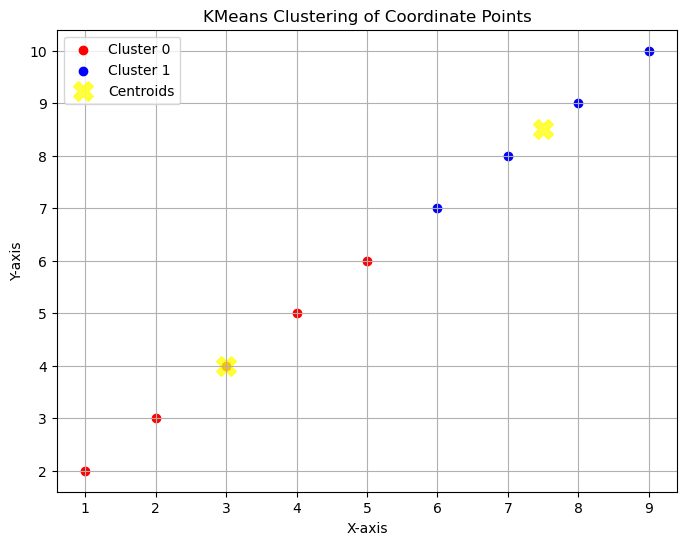

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 你的坐标点数据
data = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10]]

# 将数据转换为numpy数组
data_np = np.array(data)

# 使用KMeans进行聚类，这里我们指定聚类数为2
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_np)
labels = kmeans.labels_

# 根据聚类标签将数据分组
cluster_0 = data_np[labels == 0]
cluster_1 = data_np[labels == 1]

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], c='r', label='Cluster 0')
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='b', label='Cluster 1')

# 绘制聚类中心
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title('KMeans Clustering of Coordinate Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()